In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bidi.algorithm import get_display
from arabic_reshaper import reshape


In [26]:
data=pd.read_csv('digikala-orders.csv')
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [27]:
data['Date']=pd.to_datetime(data['DateTime_CartFinalize'])
data['YearMonth']=data['Date'].map(lambda date:100*date.year+date.month)
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,Date,YearMonth
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0,2015-10-15 08:50:56,201510
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0,2018-02-11 00:29:26,201802
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0,2016-06-14 00:30:08,201606
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0,2018-09-03 14:37:19,201809
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0,2016-05-21 11:51:02,201605


In [28]:
amount_monthly_order=data.groupby(['YearMonth'])['Amount_Gross_Order'].sum().reset_index()
amount_monthly_order

,YearMonth,Amount_Gross_Order
0,201309,3.197792e+07
1,201310,4.030806e+08
2,201311,3.536350e+08
3,201312,4.244551e+08
4,201401,5.369787e+08
...,...,...
59,201808,6.513781e+09
60,201809,7.394628e+09
61,201810,6.187311e+09
62,201811,7.026060e+09


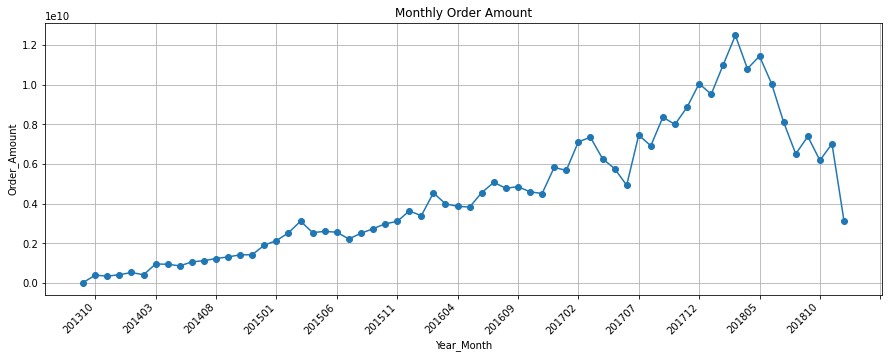

In [29]:

fig,ax=plt.subplots()
fig.set_size_inches(15,5)
ax.plot(amount_monthly_order['YearMonth'].to_numpy(dtype=str),amount_monthly_order['Amount_Gross_Order'],marker='o')
ax.xaxis.set_ticks(np.arange(1,70,5))
plt.setp(plt.gca().get_xticklabels(),rotation=45,ha='right')
ax.set_xlabel('Year_Month')
ax.set_ylabel('Order_Amount')
ax.set_title('Monthly Order Amount')
plt.grid()
plt.show()


In [30]:
#تعداد مشتزی های هر شهر
customer_per_city=data.groupby('city_name_fa')['ID_Customer'].nunique().reset_index()
customer_per_city

,city_name_fa,ID_Customer
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2
...,...,...
901,گیوی,10
902,یاسوج,229
903,یاسوکند,1
904,یامچی,1


In [31]:
#مجموع مشتری های تمام شهرها
count_customers=customer_per_city['ID_Customer'].sum()
#count_customers=np.array(count_customers)
count_customers=pd.to_numeric(count_customers)
count_customers


153709

In [32]:
tehran=customer_per_city.loc[(customer_per_city['city_name_fa']=='تهران')]
mashhad=customer_per_city.loc[(customer_per_city['city_name_fa']=='مشهد')]
esfahan=customer_per_city.loc[(customer_per_city['city_name_fa']=='اصفهان')]
karaj=customer_per_city.loc[(customer_per_city['city_name_fa']=='کرج')]
ahvaz=customer_per_city.loc[(customer_per_city['city_name_fa']=='اهواز')]
shiraz=customer_per_city.loc[(customer_per_city['city_name_fa']=='شیراز')]
rasht=customer_per_city.loc[(customer_per_city['city_name_fa']=='رشت')]
tabriz=customer_per_city.loc[(customer_per_city['city_name_fa']=='تبریز')]


In [33]:

teh=tehran['ID_Customer'].to_numpy()
mash=mashhad['ID_Customer'].to_numpy()
es=esfahan['ID_Customer'].to_numpy()
ka=karaj['ID_Customer'].to_numpy()
ah=ahvaz['ID_Customer'].to_numpy()
sh=shiraz['ID_Customer'].to_numpy()
ra=rasht['ID_Customer'].to_numpy()
tab=tabriz['ID_Customer'].to_numpy()

teh

array([81048], dtype=int64)

In [34]:
teh=pd.to_numeric(tehran['ID_Customer'])
mash=pd.to_numeric(mashhad['ID_Customer'])
es=pd.to_numeric(esfahan['ID_Customer'])
ka=pd.to_numeric(karaj['ID_Customer'])
ah=pd.to_numeric(ahvaz['ID_Customer'])
sh=pd.to_numeric(shiraz['ID_Customer'])
ra=pd.to_numeric(rasht['ID_Customer'])
tab=pd.to_numeric(tabriz['ID_Customer'])



In [35]:
teh=int(teh)
mash=int(mash)
es=int(es)
ka=int(ka)
ah=int(ah)
sh=int(sh)
ra=int(ra)
tab=int(tab)

In [36]:
#مجموع مشتری های شهرهای دیگر 
count_other_customer=count_customers-(teh+mash+es+ka+ah+sh+ra+tab)
coc=int(count_other_customer)
coc


47647

In [37]:
def func(pct):
  return "{:1.1f}%".format(pct)


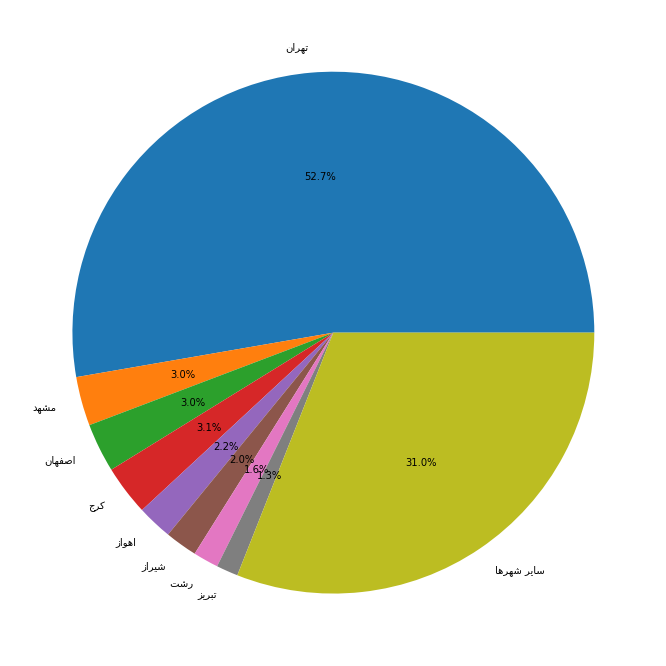

In [40]:
count=np.array([teh,mash,es,ka,ah,sh,ra,tab,coc])
count=count.flatten()
lbl=['تهران','مشهد','اصفهان','کرج','اهواز','شیراز','رشت ','تبریز','سایر شهرها']
persian_lbl=[get_display(reshape(label)) for label in lbl]
count.flatten
count.shape
plt.figure(figsize=(12,12))
plt.pie(count,labels=persian_lbl,autopct=lambda pct: func(pct),textprops={'fontsize':10,'fontname':'b-nazanin'})
#plt.legend()
plt.show()
